# SVM Spam Filter

In [1]:
import numpy as np
import numexpr as ne
from sklearn import svm
import matplotlib.pyplot as plt
import scipy.io

In [2]:
def load_data_from_path(path):    
    data = scipy.io.loadmat(path)
    X_raw = data['X']
    y_raw = data['y']
    avg_X = np.average(X_raw, axis=0)
    std_X = np.average(X_raw, axis=0)
    X = (X_raw - avg_X) / std_X
    y = y_raw.flatten()
    X_cls1 = X[y == 0]
    X_cls2 = X[y == 1]
    return X_raw, y_raw, X, y, X_cls1, X_cls2

In [3]:
def plot_data(X_cls1, X_cls2):
    fig = plt.figure(figsize=(8, 6))
    plt.plot(X_cls1[:, 0], X_cls1[:, 1], 'yo')
    plt.plot(X_cls2[:, 0], X_cls2[:, 1], 'b+')
    plt.show()

In [4]:
def plot_svm_figure(X, y, C):
    svc = svm.SVC(kernel='linear', C=C).fit(X, y)
    rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
    poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
    lin_svc = svm.LinearSVC(C=C).fit(X, y)
    
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = .02

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # title for the plots
    titles = ['SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel']


    fig = plt.figure(figsize=(8, 6))
    for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        plt.subplot(2, 2, i + 1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.title(titles[i])

    plt.show()

In [5]:
X_raw, y_raw, X, y, X_cls1, X_cls2 = load_data_from_path('data/ex6data1.mat')

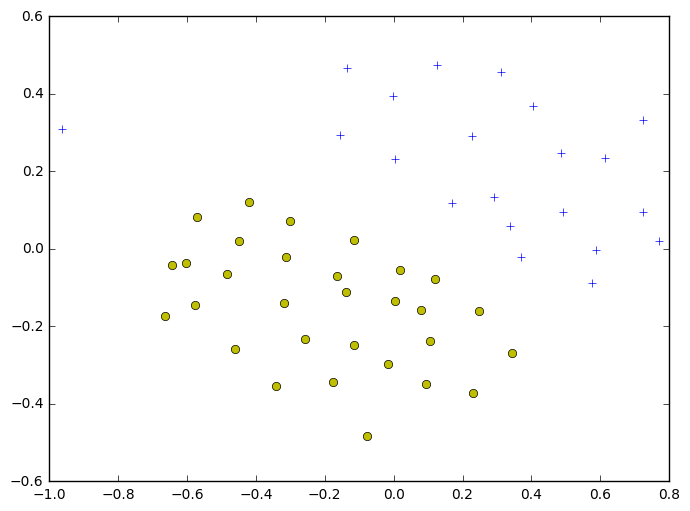

In [6]:
plot_data(X_cls1, X_cls2)

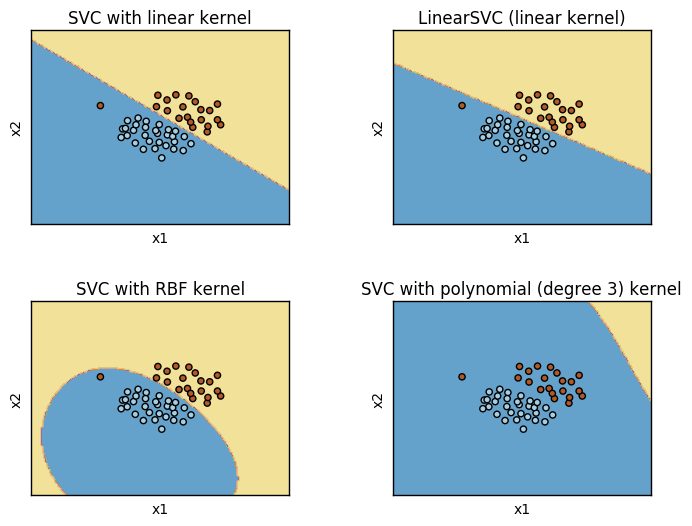

In [7]:
plot_svm_figure(X, y, C=1)